In [2]:
import cv2 as cv
import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt

# Affine Transformations

## Translation

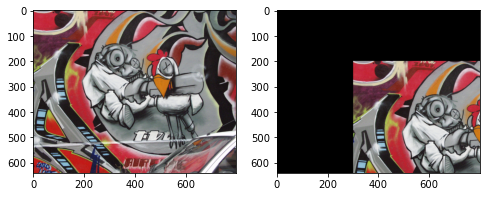

In [2]:
im1 = cv.imread("assets/graf/img1.ppm", cv.IMREAD_ANYCOLOR)
assert im1 is not None

trans = np.array([
    [1, 0, 300],
    [0, 1, 200],
    [0, 0, 1]
]).astype(np.float32)
trans_img = cv.warpPerspective(im1, trans, (np.array(im1.shape[:2])[::-1]))

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(trans_img, cv.COLOR_BGR2RGB))

plt.show()

## Scaling

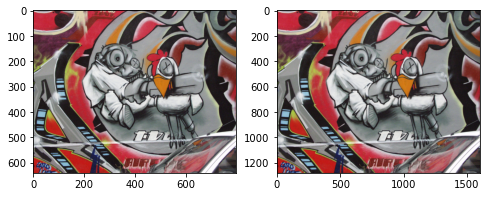

In [6]:
im1 = cv.imread("assets/graf/img1.ppm", cv.IMREAD_ANYCOLOR)
assert im1 is not None

s = 2
scale = np.array([
    [s, 0, 0],
    [0, s, 0]
]).astype(np.float32)
scaled_img = cv.warpAffine(im1, scale, (np.array(im1.shape[:2])[::-1]*s))
# Similar output can be gained by the warpPerspective like follows
# scale = np.array([
#     [s, 0, 0],
#     [0, s, 0],
#     [0, 0, 1]
# ]).astype(np.float32)
# scaled_img = cv.warpPerspective(im1, scale, (np.array(im1.shape[:2])[::-1]*s))


fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(scaled_img, cv.COLOR_BGR2RGB))

plt.show()

## Rotation

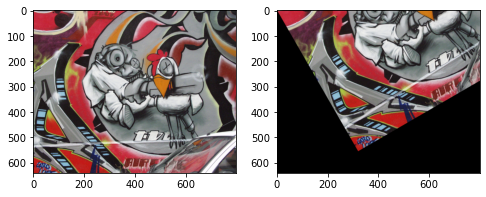

In [7]:
im1 = cv.imread("assets/graf/img1.ppm", cv.IMREAD_ANYCOLOR)
assert im1 is not None

theta = -30 *pi/180
rot = np.array([
    [cos(theta), -sin(theta), 0],
    [sin(theta), cos(theta), 0]
]).astype(np.float32)
rot_img = cv.warpAffine(im1, rot, (np.array(im1.shape[:2])[::-1]))

# Similar output can be gained by the warpPerspective like follows
# rot = np.array([
#     [cos(theta), -sin(theta), 0],
#     [sin(theta), cos(theta), 0],
#     [0, 0, 1]
# ]).astype(np.float32)
# rot_img = cv.warpPerspective(im1, rot, (np.array(im1.shape[:2])[::-1]))

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(rot_img, cv.COLOR_BGR2RGB))

plt.show()

## All in one

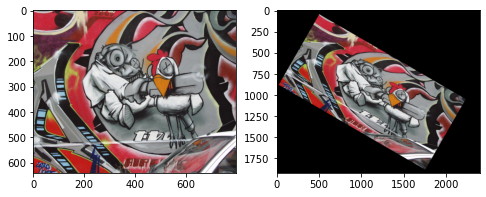

In [8]:
im1 = cv.imread("assets/graf/img1.ppm", cv.IMREAD_ANYCOLOR)
assert im1 is not None

theta = 30 *pi/180
t_x = 500
t_y = 50
s_x = 2.5
s_y = 1.5
rot = np.array([
    [s_x*cos(theta), -s_y*sin(theta), t_x],
    [s_x*sin(theta), s_y*cos(theta), t_y]
]).astype(np.float32)
rot_img = cv.warpAffine(im1, rot, (np.array(im1.shape[:2])[::-1])*3)

# Similar output can be gained by the warpPerspective like follows
# rot = np.array([
#     [s_x*cos(theta), -s_y*sin(theta), t_x],
#     [s_x*sin(theta), s_y*cos(theta), t_y],
#     [0, 0, 1]
# ]).astype(np.float32)
# rot_img = cv.warpPerspective(im1, rot, (np.array(im1.shape[:2])[::-1])*3)

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(rot_img, cv.COLOR_BGR2RGB))

plt.show()

## Skewing and Reflextion

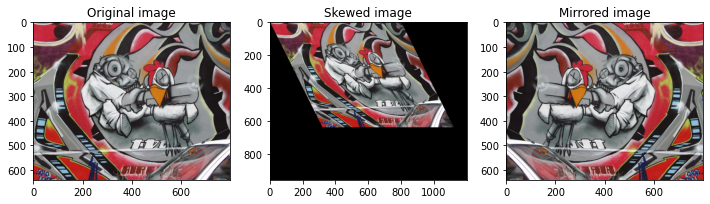

In [9]:
im1 = cv.imread("assets/graf/img1.ppm", cv.IMREAD_ANYCOLOR)
assert im1 is not None

m_x = 0.5
m_y = 0

skew = np.array([
    [1, m_x, 0],
    [m_y, 1, 0]
]).astype(np.float32)
mirr = np.array([
    [-1, 0, im1.shape[1]],
    [0, 1, 0]
]).astype(np.float32)

skew_img = cv.warpAffine(im1, skew, ((np.array(im1.shape[:2])[::-1])*1.5).astype(int))
mirr_img = cv.warpAffine(im1, mirr, (np.array(im1.shape[:2])[::-1]))

fig, ax = plt.subplots(1,3, figsize=(4*3,4))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[1].imshow(cv.cvtColor(skew_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Skewed image")
ax[2].imshow(cv.cvtColor(mirr_img, cv.COLOR_BGR2RGB))
ax[2].set_title("Mirrored image")

plt.show()

# Projective Transformations

In [26]:
def getHomography(source_points, destination_points):
    homography = np.zeros((3,3))
    A = np.zeros((4*2, 9))
    for i in range(4):
        s = source_points[i]
        d = destination_points[i]
        A[2*i] = np.array([s[0], s[1], 1, 0, 0, 0, -d[0]*s[0], -d[0]*s[1], -d[0]])
        A[2*i+1] = np.array([0, 0, 0, s[0], s[1], 1, -d[1]*s[0], -d[1]*s[1], -d[1]])
    print(A)
    return homography

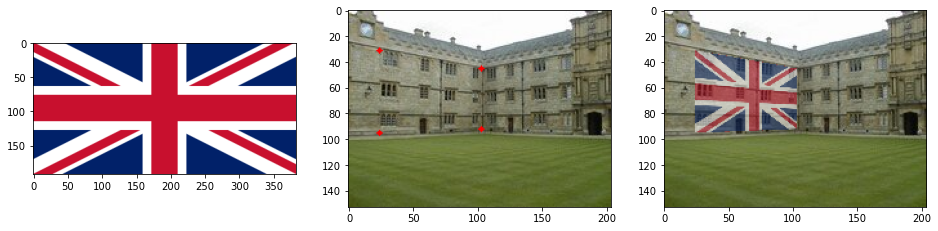

In [35]:
building = cv.imread("assets/warp/building-1.jpg", cv.IMREAD_ANYCOLOR)
flag = cv.imread("assets/warp/flag-uk.png", cv.IMREAD_ANYCOLOR)

source_points = np.array([
    [0,0],
    [flag.shape[1], 0],
    [0, flag.shape[0]],
    [flag.shape[1], flag.shape[0]],
]).astype(np.float32)
destination_points = np.array([
    [24, 31],
    [103, 45],
    [24, 95],
    [103, 92]
]).astype(np.float32)           # By manually inspecting the image
opacity = 0.5 # (should be between 0 and 1)

display_building = building.copy()
for i in range(4):
    cv.circle(display_building, destination_points[i].astype(int), 2, [0,0,255], -1)

homography = cv.getPerspectiveTransform(source_points, destination_points)
warped_img = cv.warpPerspective(flag, homography, building.shape[:2][::-1])
output = building.copy()
boolean_mat = warped_img != 0
output[boolean_mat] = warped_img[boolean_mat]*opacity + building[boolean_mat]*(1-opacity)

fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(cv.cvtColor(flag, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(display_building, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.show()